https://www.datacamp.com/tutorial/introduction-customer-segmentation-python

Identify Potential Customer Segments using RFM in Python Importing Required Library

In [39]:
#import modules
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt

In [52]:
data=pd.read_csv('OnlineRetail.csv',encoding = "ISO-8859-1")

In [53]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Removing Duplicates
Sometimes you get a messy dataset. You may have to deal with duplicates, which will skew your analysis. In python, pandas offer function drop_duplicates(), which drops the repeated or duplicate records.

In [57]:
filtered_data=data[['Country','CustomerID']].drop_duplicates()


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


Let's Jump into Data Insights

<AxesSubplot:>

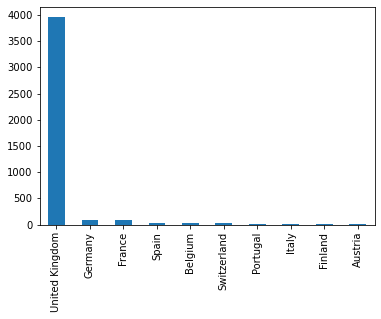

In [58]:
#Top ten country's customer
filtered_data.Country.value_counts()[:10].plot(kind='bar')


In the given dataset, you can observe most of the customers are from the "United Kingdom". So, you can filter data for United Kingdom customer.

In [59]:
uk_data=data[data.Country=='United Kingdom']


In [60]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490300 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    490300 non-null  object 
 1   StockCode    490300 non-null  object 
 2   Description  488846 non-null  object 
 3   Quantity     490300 non-null  int64  
 4   InvoiceDate  490300 non-null  object 
 5   UnitPrice    490300 non-null  float64
 6   CustomerID   356728 non-null  float64
 7   Country      490300 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.7+ MB


In [61]:
uk_data.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [62]:
uk_data.describe()


,Quantity,UnitPrice,CustomerID
count,490300.000000,490300.000000,356728.000000
mean,8.668831,4.554859,15543.795284
std,228.768014,99.837980,1594.286219
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14191.000000
50%,3.000000,2.100000,15513.000000
75%,10.000000,4.130000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [63]:
uk_data = uk_data[(uk_data['Quantity']>0)]

In [67]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,481143.000000,481143.000000,349227.000000
mean,9.806500,3.809942,15548.333625
std,164.116084,41.490246,1594.403077
min,1.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14191.000000
50%,3.000000,2.100000,15518.000000
75%,10.000000,4.130000,16931.000000
max,80995.000000,13541.330000,18287.000000


In [68]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481143 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    481143 non-null  object 
 1   StockCode    481143 non-null  object 
 2   Description  480551 non-null  object 
 3   Quantity     481143 non-null  int64  
 4   InvoiceDate  481143 non-null  object 
 5   UnitPrice    481143 non-null  float64
 6   CustomerID   349227 non-null  float64
 7   Country      481143 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.0+ MB


In [69]:
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]


In [70]:
uk_data['InvoiceDate'].min(),uk_data['InvoiceDate'].max()


('1/10/2011 10:32', '9/9/2011 9:52')

In [71]:
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['UnitPrice']


<ipython-input-71-5b4106a690b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['UnitPrice']


In [72]:
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

<ipython-input-72-daf15c152b38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])


In [73]:
uk_data['InvoiceDate'].min(),uk_data['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

In [74]:
PRESENT = dt.datetime(2011,12,10)

In [75]:
uk_data.head()


,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


In [76]:
rfm= uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})


In [78]:
rfm.head()

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4413,33053.19
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [79]:
# Change the name of columns
rfm.columns=['monetary','frequency','recency']


In [80]:
rfm['recency'] = rfm['recency'].astype(int)


In [81]:
rfm.head()


,monetary,frequency,recency
CustomerID,,,
12346.0,325,1,77183
12747.0,2,103,4196
12748.0,0,4413,33053
12749.0,3,199,4090
12820.0,3,59,942


Computing Quantile of RFM values
Customers with the lowest recency, highest frequency and monetary amounts considered as top customers.

qcut() is Quantile-based discretization function. qcut bins the data based on sample quantiles. For example, 1000 values for 4 quantiles would produce a categorical object indicating quantile membership for each customer.

In [82]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])


In [83]:
rfm.head()


,monetary,frequency,recency,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,1,77183,4,4,1
12747.0,2,103,4196,4,1,4
12748.0,0,4413,33053,4,1,4
12749.0,3,199,4090,4,1,4
12820.0,3,59,942,3,2,4


RFM Result Interpretation
Combine all three quartiles(r_quartile,f_quartile,m_quartile) in a single column, this rank will help you to segment the customers well group.

In [84]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()


,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183,4,4,1,441
12747.0,2,103,4196,4,1,4,414
12748.0,0,4413,33053,4,1,4,414
12749.0,3,199,4090,4,1,4,414
12820.0,3,59,942,3,2,4,324


In [85]:
# Filter out Top/Best cusotmers
rfm[rfm['RFM_Score']=='111'].sort_values('monetary', ascending=False).head()


,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
